In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_df = pd.read_csv("/content/Cust_Spend_Data_New.csv")

In [ ]:
data_df.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
5,6,Aide,3039,21,1,8,12
6,7,Alex,4676,22,3,8,13
7,8,Alexandria,7869,14,6,3,3
8,9,Alline,5585,21,2,10,12
9,10,Allyn,4589,23,2,8,9


In [ ]:
data_df.shape

(829, 7)

In [ ]:
data_df.dtypes

,0
Cust_ID,int64
Name,object
Avg_Mthly_Spend,int64
No_Of_Visits,int64
Apparel_Items,int64
FnV_Items,int64
Staples_Items,int64


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [ ]:
data_df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,415.000000,4801.276236,17.856454,3.961399,7.623643,8.338963
std,239.455981,2056.494189,4.367192,2.056204,3.665773,4.250284
min,1.000000,549.000000,2.000000,0.000000,1.000000,0.000000
25%,208.000000,4156.000000,15.000000,3.000000,6.000000,5.000000
50%,415.000000,4516.000000,18.000000,4.000000,7.000000,8.000000
75%,622.000000,4910.000000,20.000000,5.000000,8.000000,10.000000
max,829.000000,10000.000000,29.000000,10.000000,19.000000,20.000000


In [ ]:
data_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
824,False
825,False
826,False
827,False


In [ ]:
data_df.duplicated().sum()

np.int64(0)

In [ ]:
data_df.duplicated().sum()

np.int64(0)

In [ ]:
cust_df = data_df.drop(['Name','Cust_ID'], axis=1)

In [ ]:
cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler()

In [ ]:
scaled_data = X.fit_transform(cust_df)

In [ ]:
scaled_data

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

Above is the array created for creating clusters

In [ ]:
k_means = KMeans(n_clusters =2)

In [ ]:
k_means.fit(scaled_data)

KMeans(n_clusters=2)

In [ ]:
k_means.labels_

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [ ]:
k_means.inertia_

2466.6107602039165

In [ ]:
k_means =KMeans(n_clusters=3)
k_means.fit(scaled_data)
k_means.inertia_

1074.3823802989507

In [ ]:
k_means =KMeans(n_clusters=4)
k_means.fit(scaled_data)
k_means.inertia_

909.7038745343945

In [ ]:
k_means =KMeans(n_clusters=1)
k_means.fit(scaled_data)
k_means.inertia_

4145.0

In [ ]:
k_means =KMeans(n_clusters=5)
k_means.fit(scaled_data)
k_means.inertia_

822.844828510718

In [ ]:
k_means =KMeans(n_clusters=6)
k_means.fit(scaled_data)
k_means.inertia_

716.9046480813372

In [ ]:
wss =[]

In [ ]:
for i in range(1,11):
  k_means =KMeans(n_clusters=i)
  k_means.fit(scaled_data)
  wss.append(k_means.inertia_)

In [ ]:
wss

[4145.0,
 2466.6107602039165,
 1074.3823802989507,
 909.4495242917942,
 821.6823915546682,
 728.4206971813047,
 650.0207597990023,
 587.5315020191932,
 540.3778340516727,
 526.9533341839939]

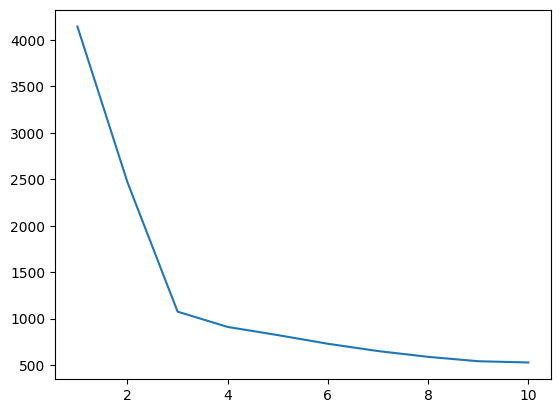

In [ ]:
plt.plot(range(1,11), wss)

In [ ]:
k_means =KMeans(n_clusters=3)
k_means.fit(scaled_data)
labels = k_means.labels_

In [ ]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans
0,1,Abraham,1123,28,1,16,14,1
1,2,Adela,9818,13,5,2,5,2
2,3,Adelina,9824,10,10,2,2,2
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,1


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(scaled_data, labels)

np.float64(0.5863370901372584)

In [ ]:
sil_width = silhouette_samples(scaled_data, labels)

In [ ]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,1,0.656055
1,2,Adela,9818,13,5,2,5,2,0.512424
2,3,Adelina,9824,10,10,2,2,2,0.582380
3,4,Adrian,3097,23,2,8,9,0,0.375197
4,5,Adrianna,817,28,1,17,17,1,0.703167


In [ ]:
silhouette_score(scaled_data, labels).min()

np.float64(0.5863370901372584)

In [ ]:
data_df.to_csv('km.csv')

**Summary of Analysis**

The analysis aimed to perform customer segmentation using KMeans clustering on the provided customer data.

1.  **Data Loading and Exploration**: The customer data was loaded and initial exploration was done to understand its structure, data types, and summary statistics. It was confirmed that there were no duplicate rows.
2.  **Data Preprocessing**: The 'Name' and 'Cust_ID' columns were dropped as they are not relevant for clustering. The remaining features were scaled using `StandardScaler` to ensure that all features contribute equally to the clustering process.
3.  **Determining Optimal Number of Clusters (Elbow Method)**: The Elbow method was used to determine the optimal number of clusters by calculating the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (from 1 to 10). The plot of WCSS against the number of clusters showed a clear elbow at k=3, suggesting that 3 is a reasonable number of clusters.
4.  **KMeans Clustering**: KMeans clustering was performed with 3 clusters on the scaled data.
5.  **Evaluating Clustering (Silhouette Score)**: The silhouette score was calculated to evaluate the quality of the clustering. A silhouette score of approximately 0.59 indicates that the clusters are reasonably well-separated. The individual silhouette widths for each sample were also calculated and added to the dataframe.
6.  **Output**: The resulting clusters and silhouette widths were added as new columns to the original dataframe, which was then saved as a CSV file named 'km.csv'.
